<a href="https://colab.research.google.com/github/captmmari/Decsriptive-analysis-Independent-project/blob/main/Moringa_Independent_Project_Simon_Mmari_Week02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Defining the question.**

**Introduction**

FIFA World Ranking is a ranking system for National teams in association football, currently led by Germany. The teams of the member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

**Specifying the question**


Predicting number of home and away scores to be scored

# **1.1 Understanding the context**

In this project, we will predict accurate home and away scores to be resulte at the end of a match. we will achieve this by doing Polynomial Regression and logistic regression.

# **1.2 Recording experimental design**

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5 Polynomial Regression

6 Logistic regression

6 Giving accurate Predictions of home and away scores

# 1.3 **Importing Libraries.**

In [1]:
# Importing libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# **1.4 Loading datasets.**

In [2]:
# loading Fifa ranking dataset
fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
# loading results Dataset
res = pd.read_csv('/content/results.csv')
res

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


# **1.5 Checking the Dataset**

**1.5.0 Fifa Ranking.**

In [4]:
# Previewing the top dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Previewing the bottom dataset
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
# Dataset shape
fifa.shape

(57793, 16)

Fifa dataset has 57793 rows and 16 columns

 **1.5.1 Results Dataset.**

In [7]:
# Previewing top dataset
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Previewing bottom dataset
res.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [9]:
# Checking dataset shape
res.shape

(40839, 9)

Dataset has 40839 rows and 9 columns.

# 1.6 Cleaning The datasets

In [10]:
# Checking for null values in Fi
fifa.isnull().sum()

# Dataset has no null values

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [11]:
# Checking for duplicated 
fifa.duplicated().sum()

# dataset has 37 duplicated values.

37

In [12]:
# Dropping duplicated values
Fifa = fifa.drop_duplicates()
print(Fifa)

# there is need to drop this duplicated values because they will bring about errors in getting accurate analysis

       rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57756 rows x 16 columns]


In [13]:
# Checking if Duplicates have been dropped
Fifa.duplicated().sum()

0

In [14]:
# Checking dataset columns
Fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [15]:
# Dropping some columns
Fifa.drop([ 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'], axis = 1, inplace = True);
Fifa

# Dropped some columns as they will not be used in my analysis

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,CAF,2018-06-07


In [16]:
# Dropping other columns in the dataset
Fifa.drop(['country_abrv', 'previous_points'], axis = 1, inplace = True);
Fifa

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country_full,total_points,rank_change,confederation,rank_date
0,1,Germany,0.0,0,UEFA,1993-08-08
1,2,Italy,0.0,0,UEFA,1993-08-08
2,3,Switzerland,0.0,9,UEFA,1993-08-08
3,4,Sweden,0.0,0,UEFA,1993-08-08
4,5,Argentina,0.0,5,CONMEBOL,1993-08-08
...,...,...,...,...,...,...
57788,206,Anguilla,0.0,1,CONCACAF,2018-06-07
57789,206,Bahamas,0.0,1,CONCACAF,2018-06-07
57790,206,Eritrea,0.0,1,CAF,2018-06-07
57791,206,Somalia,0.0,1,CAF,2018-06-07


In [17]:
# rename some columns
Fifa.rename({'country_full' : 'Country'}, axis = 1,inplace = True)
Fifa

# Renamed some columns to shorten them for easy remembrance.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,Country,total_points,rank_change,confederation,rank_date
0,1,Germany,0.0,0,UEFA,1993-08-08
1,2,Italy,0.0,0,UEFA,1993-08-08
2,3,Switzerland,0.0,9,UEFA,1993-08-08
3,4,Sweden,0.0,0,UEFA,1993-08-08
4,5,Argentina,0.0,5,CONMEBOL,1993-08-08
...,...,...,...,...,...,...
57788,206,Anguilla,0.0,1,CONCACAF,2018-06-07
57789,206,Bahamas,0.0,1,CONCACAF,2018-06-07
57790,206,Eritrea,0.0,1,CAF,2018-06-07
57791,206,Somalia,0.0,1,CAF,2018-06-07


In [18]:
# Checking data types
Fifa.dtypes

rank               int64
Country           object
total_points     float64
rank_change        int64
confederation     object
rank_date         object
dtype: object

In [19]:
Fifa.rank_date = pd.to_datetime(Fifa.rank_date)
Fifa.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


rank                      int64
Country                  object
total_points            float64
rank_change               int64
confederation            object
rank_date        datetime64[ns]
dtype: object

In [20]:
Fifa.head()

,rank,Country,total_points,rank_change,confederation,rank_date
0,1,Germany,0.0,0,UEFA,1993-08-08
1,2,Italy,0.0,0,UEFA,1993-08-08
2,3,Switzerland,0.0,9,UEFA,1993-08-08
3,4,Sweden,0.0,0,UEFA,1993-08-08
4,5,Argentina,0.0,5,CONMEBOL,1993-08-08


In [21]:
# Checking results column 
res.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [22]:
# Checking for null values
res.isnull().sum()

# Dataset has no null values.


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [105]:
# Checking for duplicated values
res.duplicated().sum()

# Dataset has ni null values.


0

In [24]:
## Checking dataset description
res.describe().sum()

home_score    40877.494854
away_score    40865.593224
dtype: float64

In [25]:
# Checking Dataset types
res.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [26]:
# Converting Date columns to timings
res['date'] = pd.to_datetime(res['date'])
res.dtypes

# Converted to date timings to be able to merge the two data sets in a time format

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [27]:
#
res['year'] = res['date'].dt.year
res.head()

# Created a year column for easier analysing

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [28]:
# Creating a year and month column from the datetime object
#
Fifa['year'] = Fifa.rank_date.dt.year
res['year'] = Fifa.rank_date.dt.year

Fifa['month'] = Fifa.rank_date.dt.month
res['month'] = Fifa.rank_date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
Fifa.head()

,rank,Country,total_points,rank_change,confederation,rank_date,year,month
0,1,Germany,0.0,0,UEFA,1993-08-08,1993,8
1,2,Italy,0.0,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,0.0,9,UEFA,1993-08-08,1993,8
3,4,Sweden,0.0,0,UEFA,1993-08-08,1993,8
4,5,Argentina,0.0,5,CONMEBOL,1993-08-08,1993,8


In [30]:
# Checking the unique years in the ranking dataset
#
Fifa.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [31]:
# Checking the unique years in the results dataset
#
res.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [32]:
# Merging the results dataframe to the ranking dataframe
# The dataframes have been merged on both year and month
#
df = pd.merge(res, Fifa, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])

# Merged the two datasets to be able to analyse easily using one dataset

In [33]:
# Previewing the first five columns of the combined dataset
#
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,Country,total_points,rank_change,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,1,Germany,0.0,0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,2,Italy,0.0,0,UEFA,1993-08-08
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,3,Switzerland,0.0,9,UEFA,1993-08-08
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,4,Sweden,0.0,0,UEFA,1993-08-08
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,5,Argentina,0.0,5,CONMEBOL,1993-08-08


In [34]:
# Selecting the ranking details of the home team only
#
df.home = df[df.home_team == df.country]
#previewing the first five rows of the home_combined dataframe
#
df.home.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,Country,total_points,rank_change,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,1,Germany,0.0,0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,2,Italy,0.0,0,UEFA,1993-08-08
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,3,Switzerland,0.0,9,UEFA,1993-08-08
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,4,Sweden,0.0,0,UEFA,1993-08-08
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,5,Argentina,0.0,5,CONMEBOL,1993-08-08


In [35]:
# Selecting the ranking details of the away team only
#
df.away= df[df.away_team == df.country]
#previewing the first five rows of the away_combined dataframe
#
df.away.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,Country,total_points,rank_change,confederation,rank_date
130203,1924-03-13,Catalonia,Spain,0,7,Friendly,Barcelona,Spain,False,1993,12,1,Germany,0.0,2,UEFA,1993-12-23
130204,1924-03-13,Catalonia,Spain,0,7,Friendly,Barcelona,Spain,False,1993,12,2,Italy,0.0,-1,UEFA,1993-12-23
130205,1924-03-13,Catalonia,Spain,0,7,Friendly,Barcelona,Spain,False,1993,12,3,Brazil,0.0,1,CONMEBOL,1993-12-23
130206,1924-03-13,Catalonia,Spain,0,7,Friendly,Barcelona,Spain,False,1993,12,4,Norway,0.0,1,UEFA,1993-12-23
130207,1924-03-13,Catalonia,Spain,0,7,Friendly,Barcelona,Spain,False,1993,12,5,Spain,0.0,2,UEFA,1993-12-23


In [36]:
# Selecting only the relevant columns in the away_combined dataframe
# Creating a list of relevant columns
#
relevant_cols = list(df.away.columns[9:-2])
relevant_cols.extend(['home_team', 'away_team'])

df.away = df.away[relevant_cols]

# Previewing the first two columns of the away_combined dataset
#
df.away.head()

,year,month,rank,Country,total_points,rank_change,home_team,away_team
130203,1993,12,1,Germany,0.0,2,Catalonia,Spain
130204,1993,12,2,Italy,0.0,-1,Catalonia,Spain
130205,1993,12,3,Brazil,0.0,1,Catalonia,Spain
130206,1993,12,4,Norway,0.0,1,Catalonia,Spain
130207,1993,12,5,Spain,0.0,2,Catalonia,Spain


In [37]:
# Merging the home_combined dataframe to the away_combined dataframe
# The two dataframes have been merged on year, month, home_team and away_team columns
#
final_df = pd.merge(df.home, df.away, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])
# Previewing the first five rows of the merged dataframe
final_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_x,Country_x,total_points_x,rank_change_x,confederation,rank_date,rank_y,Country_y,total_points_y,rank_change_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,1,Germany,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,2,Italy,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,3,Switzerland,0.0,9,UEFA,1993-08-08,NaN,NaN,NaN,NaN
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,4,Sweden,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,5,Argentina,0.0,5,CONMEBOL,1993-08-08,NaN,NaN,NaN,NaN


In [38]:
# Checking for missing values
# This is because a left join was used and some countries in the result dataframe are not ranked.
#
final_df.isnull().sum()


# Merged dataset has a lot of null values

date                    0
home_team               0
away_team               0
home_score              0
away_score              0
tournament              0
city                    0
country                 0
neutral                 0
year                    0
month                   0
rank_x                  0
Country_x               0
total_points_x          0
rank_change_x           0
confederation           0
rank_date               0
rank_y            6023221
Country_y         6023221
total_points_y    6023221
rank_change_y     6023221
dtype: int64

In [39]:
# Drop all missing values
final_df.dropna(how = 'any')

# Dropped the null values to avoid errors in our analysis

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_x,Country_x,total_points_x,rank_change_x,confederation,rank_date,rank_y,Country_y,total_points_y,rank_change_y


In [40]:
final_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_x,Country_x,total_points_x,rank_change_x,confederation,rank_date,rank_y,Country_y,total_points_y,rank_change_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,1,Germany,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,2,Italy,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,3,Switzerland,0.0,9,UEFA,1993-08-08,NaN,NaN,NaN,NaN
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,4,Sweden,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,5,Argentina,0.0,5,CONMEBOL,1993-08-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023216,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False,2011,10,203,American Samoa,0.0,0,OFC,2011-10-19,NaN,NaN,NaN,NaN
6023217,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False,2011,10,203,Andorra,0.0,0,UEFA,2011-10-19,NaN,NaN,NaN,NaN
6023218,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False,2011,10,203,Montserrat,0.0,0,CONCACAF,2011-10-19,NaN,NaN,NaN,NaN
6023219,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False,2011,10,203,Samoa,0.0,0,OFC,2011-10-19,NaN,NaN,NaN,NaN


In [41]:
# Checking the datatypes of the df dataframe
#
final_df.dtypes

date              datetime64[ns]
home_team                 object
away_team                 object
home_score                 int64
away_score                 int64
tournament                object
city                      object
country                   object
neutral                     bool
year                       int64
month                      int64
rank_x                     int64
Country_x                 object
total_points_x           float64
rank_change_x              int64
confederation             object
rank_date         datetime64[ns]
rank_y                   float64
Country_y                 object
total_points_y           float64
rank_change_y            float64
dtype: object

In [42]:
# Renaming some columns
final_df.rename({'rank_x' : 'rank_home', 'rank_y' : 'rank_away', 'total_points_x' : 'home_points', 'total_points_y ' : 'away_points', 'country_x' : 'country_home', 'country_y' : 'country_away', 'rank_change_x' : 'rank_home', 'rank_change_y' : 'rank_away'}, axis = 1, inplace = True)

In [43]:
# Changing the df dataframe datatypes to their appriopriate datatype
# creating a list of categorical columns
#
cat_cols = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']

# Using a for loop to change the datatypes to categorical
#
for col in cat_cols:
  final_df[col] = final_df[col].astype('category')

In [44]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

    # To be able to identify different games play offs

In [45]:
# Creating a column of total goals scored
#
final_df['total_goals'] = final_df.home_score + final_df.away_score

# 1.7 **Univariate Analysis**

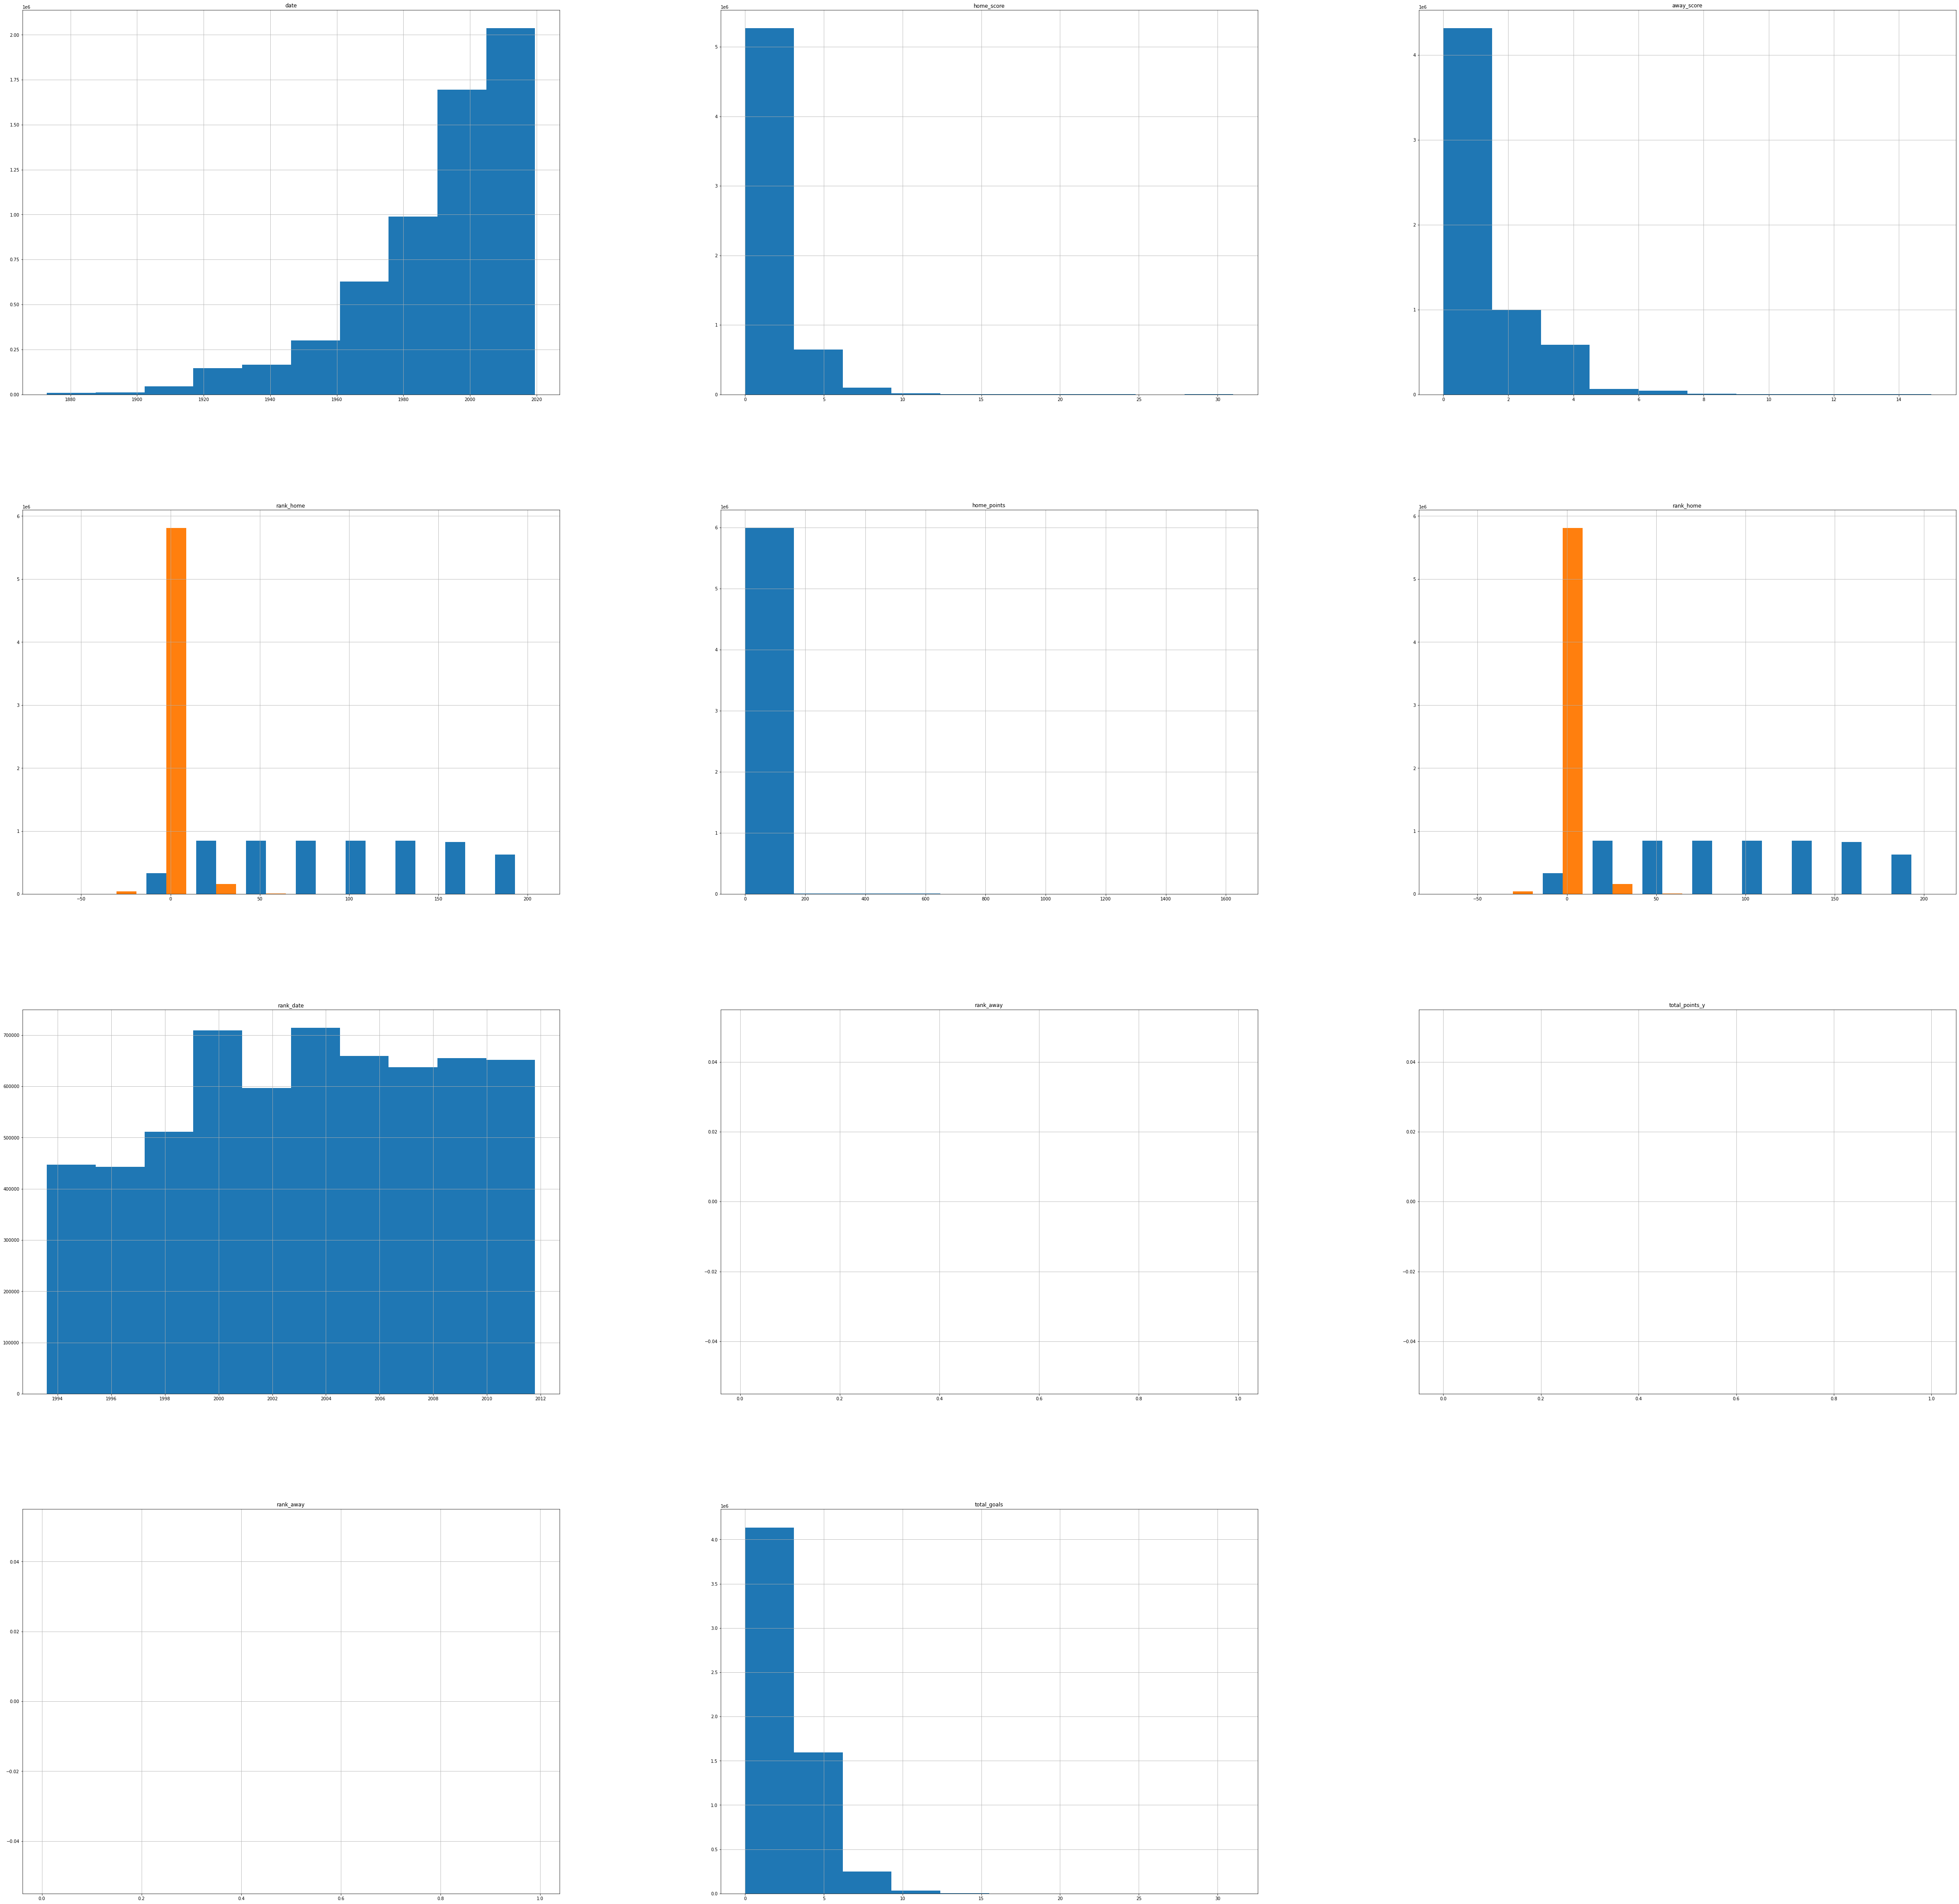

In [46]:
# Plotting Histograms
final_df.hist(figsize=(80,80), sharex=False, sharey=False, xlabelsize= 10, ylabelsize=10)
plt.show()

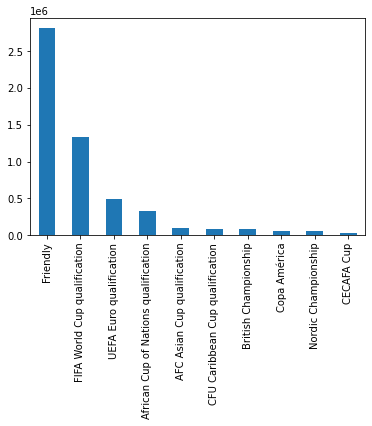

In [47]:
#Plotting a bar graph of tournament
final_df['tournament'].value_counts().head(10).plot.bar()

Friendly was the most played tournament.

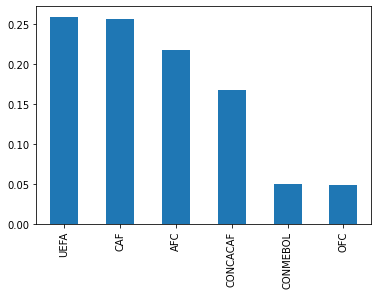

In [48]:
#plotting a bar graph for the confederation

(final_df['confederation'].value_counts().head(10)/len(final_df)).plot.bar()

UEFA is the most played confederation cup followed up closely by CAF.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


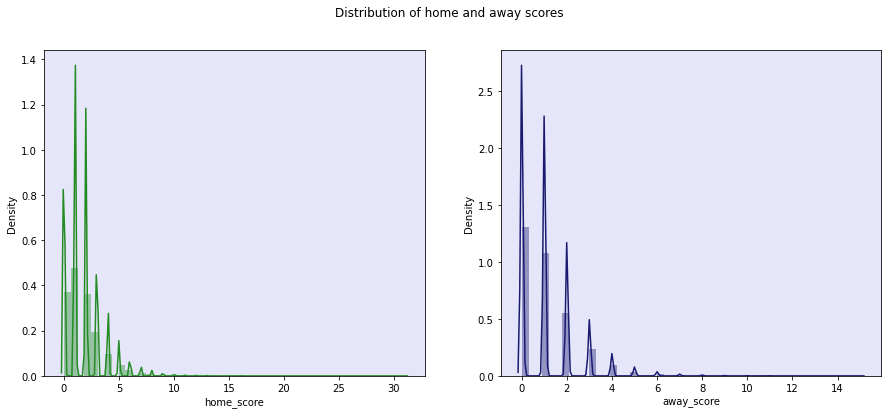

In [49]:
# Using displots to plot distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(), final_df, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(final_df[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')

From the above histograms, it can be observed that the plots are skewed to the right, which means that the mean is less than both the median and mode of goals scored

# **1.8 Bivariate Analysis.**

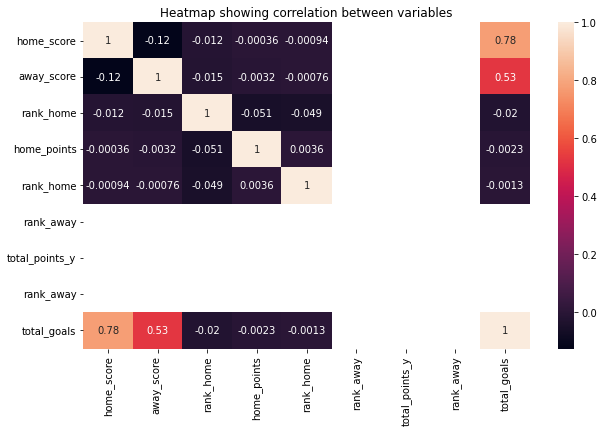

In [50]:
#Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(final_df.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

In [51]:
# Checking how our varibales are corelated using a matrix
corrMatrix = final_df.corr()
corrMatrix

# From the matrix belwo we observe that correlation amongst our variables is not very strong
#The highest being negative correlation of-0.088731	between home score and the rank 

,home_score,away_score,rank_home,home_points,rank_home,rank_away,total_points_y,rank_away,total_goals
home_score,1.000000,-0.124344,-0.012175,-0.000359,-0.000939,NaN,NaN,NaN,0.776346
away_score,-0.124344,1.000000,-0.015304,-0.003204,-0.000756,NaN,NaN,NaN,0.528881
rank_home,-0.012175,-0.015304,1.000000,-0.050883,-0.049052,NaN,NaN,NaN,-0.020136
home_points,-0.000359,-0.003204,-0.050883,1.000000,0.003585,NaN,NaN,NaN,-0.002342
rank_home,-0.000939,-0.000756,-0.049052,0.003585,1.000000,NaN,NaN,NaN,-0.001283
rank_away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_points_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_goals,0.776346,0.528881,-0.020136,-0.002342,-0.001283,NaN,NaN,NaN,1.000000


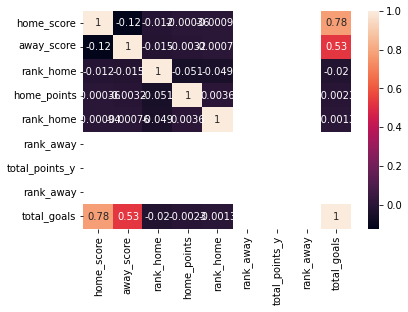

In [52]:
# investigating the correlation between variables

corelation = final_df.corr()
# using a heatmap to display the results
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

The VIF score for each variable is found alongside the downwards sloping diagonal. away_score has a score of approximately 1, rank home and rank_away has a score of approximately 1.5. All of this scores are under 5, therefore there is no multicollinearity

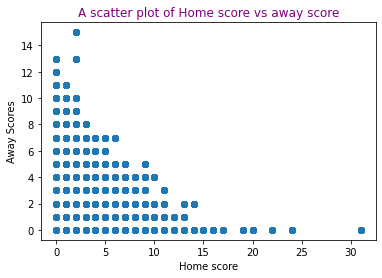

In [53]:
#Plotting our scatterplot using matplotlibplt.figure(dpi = 100)
plt.scatter(final_df['home_score'], final_df['away_score'])
plt.title('A scatter plot of Home score vs away score', color = 'purple')

plt.xlabel('Home score')

plt.ylabel('Away Scores')

plt.show()

As we can see that most of the visualizations are skewed to the left.

# **1.9 Polynomial Regression.** 

In [54]:
# Selecting columns relevant to the reasearch question
#
final_df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'rank_home', 'rank_away']]

# Previewing the first five rows of the dataset
#
final_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,Country_x,home_points,rank_home,confederation,rank_date,rank_away,Country_y,total_points_y,rank_away,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,1,Germany,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,0
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,2,Italy,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,0
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,3,Switzerland,0.0,9,UEFA,1993-08-08,NaN,NaN,NaN,NaN,0
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,4,Sweden,0.0,0,UEFA,1993-08-08,NaN,NaN,NaN,NaN,0
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1993,8,5,Argentina,0.0,5,CONMEBOL,1993-08-08,NaN,NaN,NaN,NaN,0


In [55]:
# Displaying the correlations between the variables
#
corrs = final_df.drop('home_score', axis = 1).corr()
corrs

,away_score,rank_home,home_points,rank_home,rank_away,total_points_y,rank_away,total_goals
away_score,1.000000,-0.015304,-0.003204,-0.000756,NaN,NaN,NaN,0.528881
rank_home,-0.015304,1.000000,-0.050883,-0.049052,NaN,NaN,NaN,-0.020136
home_points,-0.003204,-0.050883,1.000000,0.003585,NaN,NaN,NaN,-0.002342
rank_home,-0.000756,-0.049052,0.003585,1.000000,NaN,NaN,NaN,-0.001283
rank_away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_points_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_goals,0.528881,-0.020136,-0.002342,-0.001283,NaN,NaN,NaN,1.000000


In [56]:
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif_df

,away_score,rank_home,home_points,rank_home,rank_away,total_points_y,rank_away,total_goals
away_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_points_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_goals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


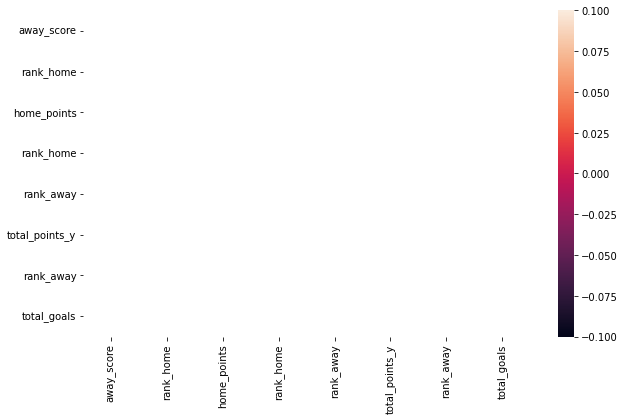

In [57]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sns.heatmap(vif_df, annot = True)
plt.show()

In [58]:
# Creating X and y variables
#
X = final_df.iloc[:, [0, 1, 3, 4, 5, 6]]
y = final_df.home_score

In [61]:
# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [71]:
final_df['home_score'].corr(final_df['total_goals'])

0.7763457561299499

In [75]:
# Split the dataset
# X = wine.drop(['quality'],axis=1)
# X = fifa_main.drop(['country_full','country_abrv','confederation','rank_date','date', 'home_team','away_team','tournament','city','country'],axis=1)
X = final_df['home_points'].values
y = final_df['home_score'].values

X = X.reshape(-1,1)
# y = y.reshape(-1,1)

In [76]:
print(X)
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[0 0 0 ... 0 0 0]


In [77]:
# Import train test split
from sklearn.model_selection import train_test_split

In [78]:
# Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [79]:
X.shape

(6023221, 1)

In [80]:
X.shape

(6023221, 1)

In [81]:
# Fit polynormial regression to dataset
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

pol_li = LinearRegression()
pol_li.fit(X_poly,y)


LinearRegression()

In [82]:
# Fit a Linear Regression
fifa_reg = LinearRegression()
fifa_reg.fit(X_poly,y)

LinearRegression()

In [84]:
# Carrying out the prediction
# Predict using Polynomial Regression

X_predict = fifa_reg.predict(X_poly)

Text(0, 0.5, 'Home Score')

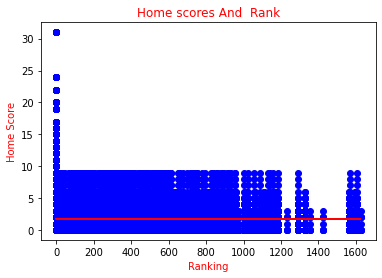

In [85]:
plt.scatter(X,y,color="blue")
plt.plot(X,X_predict,color="red")
plt.title("Home scores And  Rank", color="red")
plt.xlabel("Ranking",color="red")
plt.ylabel("Home Score",color="red")

In [86]:
print("prediction for linear Regression is",y)

prediction for linear Regression is [0 0 0 ... 0 0 0]


In [87]:
# Polynomial Regression Predition
print("prediction for Polynomial Regression is", X_predict)

prediction for Polynomial Regression is [1.75724394 1.75724394 1.75724394 ... 1.75724394 1.75724394 1.75724394]


In [88]:
# Viewing the predicted
X_predict

array([1.75724394, 1.75724394, 1.75724394, ..., 1.75724394, 1.75724394,
       1.75724394])

In [89]:
# Actual vs Prediction
compar = pd.DataFrame({'Actual': y,'predicted': X_predict})
compar.describe()

,Actual,predicted
count,6.023221e+06,6.023221e+06
mean,1.757185e+00,1.757185e+00
std,1.702040e+00,7.221635e-04
min,0.000000e+00,1.739711e+00
25%,1.000000e+00,1.757244e+00
50%,1.000000e+00,1.757244e+00
75%,2.000000e+00,1.757244e+00
max,3.100000e+01,1.757244e+00


In [93]:
X = final_df['rank_away'].values.reshape(-1,1)
y = final_df['away_score']

# **2.0 Logistic regression.**

In [97]:
# Find Value Counts
away = final_df['away_team'].value_counts()
away

Sweden           86712
England          81295
Hungary          81145
Finland          74744
Germany          72829
                 ...  
Monaco             205
Åland Islands      203
Corsica            190
Manchukuo          178
Catalonia          167
Name: away_team, Length: 266, dtype: int64

In [99]:
final_df['away_team'].unique()

['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada', ..., 'Székely Land', 'Padania', 'Timor-Leste', 'Myanmar', 'Curacao']
Length: 266
Categories (266, object): ['Abkhazia', 'Afghanistan', 'Albania', 'Alderney', ..., 'Zambia',
                           'Zanzibar', 'Zimbabwe', 'Åland Islands']

In [101]:
away_score = final_df['rank_away']

In [102]:
home_score = final_df['rank_home']

In [103]:
# Group away score by rank
rank = away_score.groupby(final_df['away_score']).sum()
pd.DataFrame(rank)


,rank_away,rank_away
away_score,,
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0


# **2.1 Conclusion.**

# **2.2 Recommendations.**